In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from imutils import paths
from enum import Enum
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import pickle
import cv2
import os

random.seed(42)

In [19]:
# Load data.
path = "/Users/rodion/Documents/cv_proj1/dataset/animals"
imagePaths = sorted(list(paths.list_images(path)))
random.shuffle(imagePaths)

data = []
labels = []

for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (32, 32))
    data.append(image)
 
    label = imagePath.split(os.path.sep)[-2]
    labels.append([label])
    
# Scale pixels.
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split.
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

# Encode labels.
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(data.shape)
print(lb.classes_)
'''
one_hot_map = {"cats": np.array([1, 0, 0]), "dogs": np.array([0, 1, 0]), "panda": np.array([0, 0, 1])}

labels = np.array(labels)
for key in one_hot_map:
    labels = np.where(labels == np.array([key]), one_hot_map[key], labels)

labels = labels.astype(np.int64)

del one_hot_map
del imagePaths
'''

(3000, 32, 32, 3)
['cats' 'dogs' 'panda']


'\none_hot_map = {"cats": np.array([1, 0, 0]), "dogs": np.array([0, 1, 0]), "panda": np.array([0, 0, 1])}\n\nlabels = np.array(labels)\nfor key in one_hot_map:\n    labels = np.where(labels == np.array([key]), one_hot_map[key], labels)\n\nlabels = labels.astype(np.int64)\n\ndel one_hot_map\ndel imagePaths\n'

In [20]:
class hps(Enum):
    EPOCHS = 1
    LEARNING_RATE = 2
    DROPOUT = 3
    
hp = {
    hps.EPOCHS: 75,
    hps.LEARNING_RATE: 0.01,
    hps.DROPOUT: 0.25
}

In [21]:
model = Sequential()
model.add(Conv2D(1, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding="valid", strides=1))
model.add(Dropout(hp[hps.DROPOUT]))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(hp[hps.DROPOUT]))
model.add(Dense(3, activation="softmax"))

opt = SGD(learning_rate=hp[hps.LEARNING_RATE])
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=hp[hps.EPOCHS], batch_size=32) 

Epoch 1/75
85/85 [==============================] - 1s 11ms/step - loss: 1.0958 - accuracy: 0.3781 - val_loss: 1.0914 - val_accuracy: 0.4533
Epoch 2/75
85/85 [==============================] - 1s 10ms/step - loss: 1.0891 - accuracy: 0.4326 - val_loss: 1.0828 - val_accuracy: 0.4900
Epoch 3/75
85/85 [==============================] - 1s 9ms/step - loss: 1.0760 - accuracy: 0.4619 - val_loss: 1.0584 - val_accuracy: 0.4600
Epoch 4/75
85/85 [==============================] - 1s 10ms/step - loss: 1.0407 - accuracy: 0.4500 - val_loss: 0.9995 - val_accuracy: 0.4900
Epoch 5/75
85/85 [==============================] - 1s 9ms/step - loss: 1.0012 - accuracy: 0.4822 - val_loss: 0.9665 - val_accuracy: 0.5500
Epoch 6/75
85/85 [==============================] - 1s 9ms/step - loss: 0.9709 - accuracy: 0.5200 - val_loss: 0.9464 - val_accuracy: 0.5100
Epoch 7/75
85/85 [==============================] - 1s 10ms/step - loss: 0.9498 - accuracy: 0.5378 - val_loss: 0.9252 - val_accuracy: 0.5200
Epoch 8/75
85/85

Epoch 59/75
85/85 [==============================] - 1s 10ms/step - loss: 0.6242 - accuracy: 0.7078 - val_loss: 0.7409 - val_accuracy: 0.6467
Epoch 60/75
85/85 [==============================] - 1s 10ms/step - loss: 0.6264 - accuracy: 0.6985 - val_loss: 0.7650 - val_accuracy: 0.6233
Epoch 61/75
85/85 [==============================] - 1s 10ms/step - loss: 0.6214 - accuracy: 0.7044 - val_loss: 0.7359 - val_accuracy: 0.6133
Epoch 62/75
85/85 [==============================] - 1s 10ms/step - loss: 0.6137 - accuracy: 0.7156 - val_loss: 0.7330 - val_accuracy: 0.6233
Epoch 63/75
85/85 [==============================] - 1s 10ms/step - loss: 0.6129 - accuracy: 0.7100 - val_loss: 0.7463 - val_accuracy: 0.6400
Epoch 64/75
85/85 [==============================] - 1s 9ms/step - loss: 0.6147 - accuracy: 0.7174 - val_loss: 0.7352 - val_accuracy: 0.6267
Epoch 65/75
85/85 [==============================] - 1s 9ms/step - loss: 0.6035 - accuracy: 0.7278 - val_loss: 0.7481 - val_accuracy: 0.6167
Epoch 66

<class 'numpy.ndarray'>
              precision    recall  f1-score   support

        cats       0.61      0.50      0.55       103
        dogs       0.48      0.45      0.47        91
       panda       0.76      0.93      0.84       106

    accuracy                           0.64       300
   macro avg       0.62      0.63      0.62       300
weighted avg       0.63      0.64      0.63       300



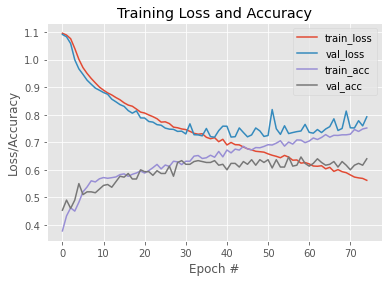

In [22]:
predictions = model.predict(X_test, batch_size=32)
print(type(Y_test.argmax(axis=1)))
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

N = np.arange(0, hp[hps.EPOCHS])
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('/Users/rodion/Documents/cv_proj1/loss_acc.png')

In [23]:
model.save('/Users/rodion/Documents/cv_proj1/cnn')
with open('/Users/rodion/Documents/cv_proj1/binarizer', "wb") as f: 
    pickle.dump(lb, f)
f.close() 

INFO:tensorflow:Assets written to: /Users/rodion/Documents/cv_proj1/cnn/assets
